# Exercises

## Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# For reproducability, fix seed.
np.random.seed(42)

## 1. Probability Spaces

### 1. Dice Simulations

In [3]:
mask_even = lambda x : x % 2 == 0 # with P(x is even) = 1/2
mask_smaller_5 = lambda x : x <= 4 # with P(x <= 4) = 2/3
mask_2_4 = lambda x : mask_even(x) & mask_smaller_5(x) # Intersection.

In [4]:
n = 1000
dice_rolls = np.random.randint(1, 7, n)

In [5]:
rolls_even = np.sum(mask_even(dice_rolls))/n
rolls_smaller_5 = np.sum(mask_smaller_5(dice_rolls))/n
rolls_2_4 = np.sum(mask_2_4(dice_rolls))/n

In [6]:
print(f"P(x is even):{rolls_even} \nP(x<5): {rolls_smaller_5}")
print(f"P(x is even and x < 5): {rolls_even * rolls_smaller_5} = {rolls_2_4}") 

P(x is even):0.493 
P(x<5): 0.673
P(x is even and x < 5): 0.331789 = 0.338


### Two events not being independent.

Let P(A) = P(x <= 3) and P(B) = P (x <= 2).

Then P(A) = 1/2 and P(B) = 1/3.

**Not independent:** P(A and B) != P(A) * P(B) as 1/3 != 1/2 * 1/3.

P(A|B) = 1

P(B|A) = 2/3


In [7]:
mask_a = lambda x : x <= 3
mask_b = lambda x : x <= 2
mask_a_and_b = lambda x : mask_a(x) & mask_b(x)

In [8]:
n = 100
dice_rolls = np.random.randint(1, 7, n)
dice_rolls

array([6, 5, 6, 6, 4, 6, 3, 6, 6, 6, 1, 3, 3, 5, 4, 6, 2, 4, 4, 3, 4, 6,
       6, 1, 6, 6, 3, 6, 1, 2, 3, 2, 3, 5, 4, 5, 6, 2, 6, 4, 3, 4, 1, 4,
       1, 4, 1, 2, 6, 6, 5, 6, 3, 4, 5, 3, 3, 1, 6, 2, 2, 5, 2, 4, 2, 5,
       2, 4, 1, 5, 1, 1, 1, 3, 6, 3, 6, 1, 5, 6, 4, 4, 2, 6, 5, 3, 1, 2,
       4, 3, 3, 1, 6, 4, 5, 3, 1, 5, 6, 4])

In [9]:
p_a = np.sum(mask_a(dice_rolls))/n
p_b = np.sum(mask_b(dice_rolls))/n
p_a_and_b = np.sum(mask_a_and_b(dice_rolls))/n

In [10]:
print(f"P(A):{p_a} \nP(B): {p_b}")
print(f"P(A and B): {p_a_and_b}") 

P(A):0.44 
P(B): 0.27
P(A and B): 0.27


In [11]:
b = dice_rolls[mask_b(dice_rolls)]
n_b = len(b)
p_a_given_b = np.sum(mask_a(b)) / n_b

a = dice_rolls[mask_a(dice_rolls)]
n_a = len(a)
p_b_given_a = np.sum(mask_b(a)) / n_a

In [12]:
print(f"P(A|B) = {p_a_given_b}")
print(f"P(B|A) = {p_b_given_a}")

P(A|B) = 1.0
P(B|A) = 0.6136363636363636


These values are close to the analytical estimated ones, P(A|B) = 1 and P(B|A) = 2/3.

### 2. Coin tosses

#### (1) Conditions.

In [13]:
n_tosses = 1000 # Needs to be even, as always two tosses are looked at.
n_toss_pairs = n_tosses // 2 # Two tosses belong together.
tosses = np.random.randint(0, 2, n_tosses)
tosses = np.split(tosses, n_toss_pairs) 
# tosses

Let 0 be heads.

In [14]:
mask_head_first_toss = lambda x : np.array([i[0] == 0 for i in x])
mask_head_snd_toss = lambda x : np.array([i[1] == 0 for i in x])
mask_same_outcome = lambda x : np.array([i[0] == i[1] for i in x])

In [15]:
p_head_first_toss = np.sum(mask_head_first_toss(tosses))/n_toss_pairs
p_head_snd_toss = np.sum(mask_head_snd_toss(tosses))/n_toss_pairs
p_same_outcome = np.sum(mask_same_outcome(tosses))/n_toss_pairs

In [16]:
print(f"P(head first toss) = {p_head_first_toss} should be similar to 1/2")
print(f"P(head snd toss) = {p_head_snd_toss} should be similar to 1/2")
print(f"P(same outcome) = {p_same_outcome} should be similar to 1/2")

P(head first toss) = 0.508 should be similar to 1/2
P(head snd toss) = 0.55 should be similar to 1/2
P(same outcome) = 0.47 should be similar to 1/2


The simulated values match the analytical ones.

#### (2) Co-Occurences.

In [17]:
# Pair_wise
mask_head_first_toss_same_outcome = lambda x : mask_head_first_toss(x) & mask_same_outcome(x)
mask_head_snd_toss_same_outcome = lambda x : mask_head_snd_toss(x) & mask_same_outcome(x)
mask_head_first_snd_toss = lambda x : mask_head_first_toss(x) & mask_head_snd_toss(x)
mask_all_conditions = lambda x : mask_same_outcome(x) & mask_head_first_toss(x) & mask_head_snd_toss(x)

In [18]:
p_head_first_toss_same_outcome = np.sum(mask_head_first_toss_same_outcome(tosses)) /n_toss_pairs
p_head_snd_toss_same_outcome = np.sum(mask_head_snd_toss_same_outcome(tosses)) /n_toss_pairs
p_head_first_snd_toss = np.sum(mask_head_first_snd_toss(tosses)) /n_toss_pairs
p_all_cond = np.sum(mask_all_conditions(tosses)) /n_toss_pairs

In [19]:
print(f"P(first toss is head and same outcome) = {p_head_first_toss_same_outcome}")
print(f"P(snd toss is head and same outcome) = {p_head_snd_toss_same_outcome}")
print(f"P(first and second toss is head) = {p_head_first_snd_toss}")
print(f"P(first and second toss is head and the outcome is the same) = {p_all_cond}")

P(first toss is head and same outcome) = 0.264
P(snd toss is head and same outcome) = 0.264
P(first and second toss is head) = 0.264
P(first and second toss is head and the outcome is the same) = 0.264


The simulated values look similar to the analytical ones (1/4).

## 2. Random Variables

### 1. Probability Mass and and Probability Density

In [ ]:
The blue will always indicate the sampled

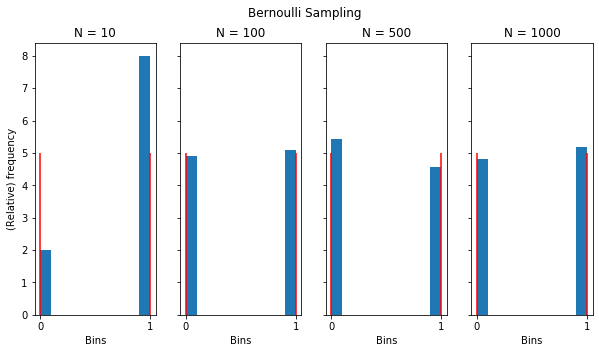

In [60]:
# Bernoulli Random Variable.

number_samples = [10, 100, 500, 1000]

fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharey = True, sharex = True, figsize = (10, 5))
axs = axs.ravel()

for n, ax in zip(number_samples, axs):
    throws = np.random.randint(0, 2, n)
    
    # Sampled function.
    no, bins, _ = ax.hist(throws, density = True, stacked = True, bins = 10)
    
    # Reference function for bins = 10.
    ax.vlines(0, 0, 5, color='r')
    ax.vlines(1, 0, 5, color='r')

    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")
        
    ax.set_xticks([0, 1])

axs[0].set_ylabel("(Relative) frequency")
plt.suptitle("Bernoulli Sampling");

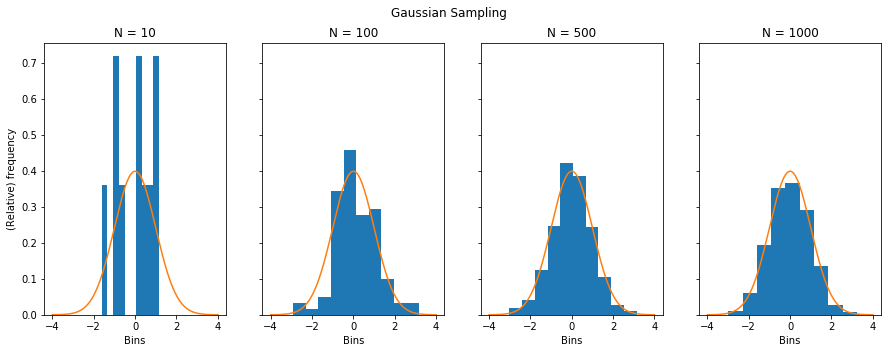

In [21]:
# Gaussian Variable.
mu = 0
sigma = 1

# Parameters for reference values for distribution.
all_ = np.linspace(-4, 4, 10000)
ref_gaussian = lambda x : 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharex = True, sharey = True, figsize = (15, 5))
axs = axs.ravel()

for n, ax, in zip(number_samples, axs):
    var_gaussian = np.random.normal(mu, sigma, n)
    
    # Sampling.
    ax.hist(var_gaussian, density = True, stacked = True)
    
    # Reference function.
    ax.plot(all_, ref_gaussian(all_))
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")

axs[0].set_ylabel("(Relative) frequency")

plt.suptitle("Gaussian Sampling");

**Normalization of Histogram for Gaussian distribution**

For the normalized histograms, the sum of all bins need to sum up to 1. This can achieved by calling his with density = True and setting stacked = True. 
For seeing what happens during the calls, see documentation for density in the matplotlib manual (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html):

"If True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If stacked is also True, the sum of the histograms is normalized to 1."

**Observation**

As expected, the approximation gets better the more samples we take.

## 2. Distributions for Beta and Gamma

In [22]:
# Used for reference functions.
from scipy.stats import beta as beta_fn
from scipy.stats import gamma as gamma_fn

### Beta.

In [23]:
# Parameters.
alpha = 0.25
beta = 0.5
all_ = np.linspace(0, 1, 100)[1:]

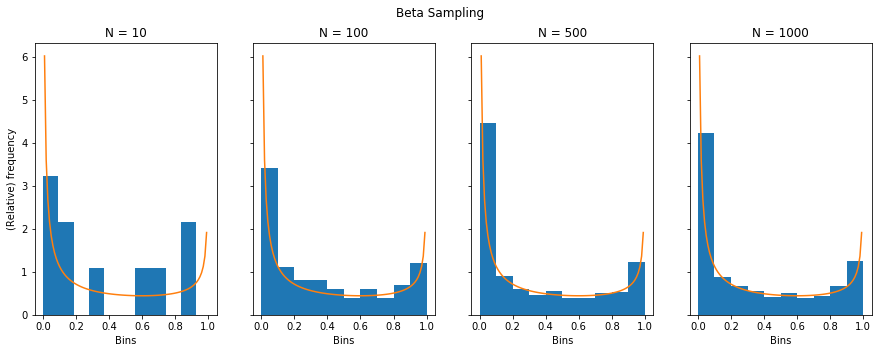

In [24]:
fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharex = True, sharey = True, figsize = (15, 5))
axs = axs.ravel()

for n, ax, in zip(number_samples, axs):
    var_beta = np.random.beta(alpha, beta, n)
    
    # Sampling.
    ax.hist(var_beta, density = True, stacked = True)
    
    # Reference function.    
    ax.plot(all_, beta_fn.pdf(all_, alpha, beta))
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")

axs[0].set_ylabel("(Relative) frequency")

plt.suptitle("Beta Sampling");

### Gamma.

In [36]:
# Parameters.
a = 2
all_ = np.linspace(0, 10, 1000)

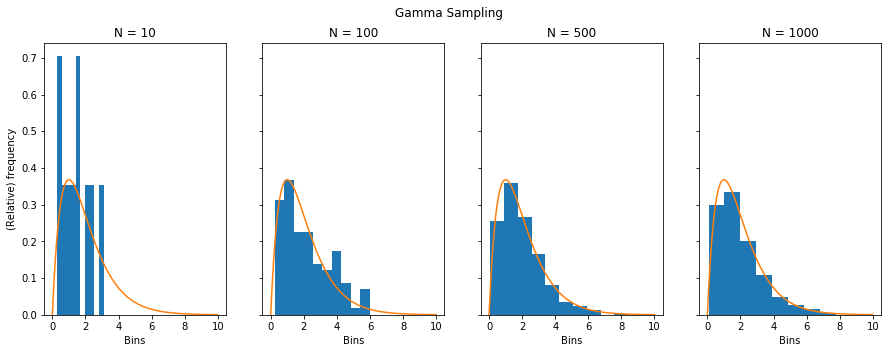

In [37]:
fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharex = True, sharey = True, figsize = (15, 5))
axs = axs.ravel()

for n, ax, in zip(number_samples, axs):
    var_gamma = np.random.gamma(a, size = n)
    
    # Sampling.
    ax.hist(var_gamma, density = True, stacked = True)
    
    # Reference function.    
    ax.plot(all_, gamma_fn.pdf(all_, a))
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")

axs[0].set_ylabel("(Relative) frequency")
plt.suptitle("Gamma Sampling");

**Observation**

The better approximation with more samples also holds true for the gamma and beta distribution.